In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 1. 데이터의 결측치를 정리해주세요.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# age 변수의 결측치는 평군값으로 대체
# deck 는 결측치가 너무 많으므로 drop
# embarked, embarked_town의 경우 2개의 결측치 존재 -> 행 삭제

df['age'] = df['age'].fillna(df['age'].mean())
df = df.drop(['deck'], axis=1)
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


### 2. 각 Feature에 따른 생존률을 계산해주세요. (수치형 변수 및 alive 변수는 제외)

In [6]:
def feature_surv(data, feature):
    uni = data[feature].unique().tolist()
    
    result = {}
    for i in uni:
        temp = data[data[feature]==i]['survived']
        perc_surv = temp.sum()/len(temp)
        result[i] = np.round(perc_surv, 4)
    print(result)
    return result

In [7]:
features = df.columns.tolist()
features = [i for i in features if i not in ['survived', 'age', 'fare', 'alive']]

for i in features:
    print(i, ': ', end='')
    result = feature_surv(df, i)

pclass : {3: 0.2424, 1: 0.6262, 2: 0.4728}
sex : {'male': 0.1889, 'female': 0.7404}
sibsp : {1: 0.5359, 0: 0.3432, 3: 0.25, 4: 0.1667, 2: 0.4643, 5: 0.0, 8: 0.0}
parch : {0: 0.3417, 1: 0.5508, 2: 0.5, 5: 0.2, 3: 0.6, 4: 0.0, 6: 0.0}
embarked : {'S': 0.337, 'C': 0.5536, 'Q': 0.3896}
class : {'Third': 0.2424, 'First': 0.6262, 'Second': 0.4728}
who : {'man': 0.1639, 'woman': 0.7546, 'child': 0.5904}
adult_male : {True: 0.1639, False: 0.7159}
embark_town : {'Southampton': 0.337, 'Cherbourg': 0.5536, 'Queenstown': 0.3896}
alone : {False: 0.5056, True: 0.3009}


### 2-2. 위 내용을 도식화하세요.

{3: 0.2424, 1: 0.6262, 2: 0.4728}
{'male': 0.1889, 'female': 0.7404}
{1: 0.5359, 0: 0.3432, 3: 0.25, 4: 0.1667, 2: 0.4643, 5: 0.0, 8: 0.0}
{0: 0.3417, 1: 0.5508, 2: 0.5, 5: 0.2, 3: 0.6, 4: 0.0, 6: 0.0}
{'S': 0.337, 'C': 0.5536, 'Q': 0.3896}
{'Third': 0.2424, 'First': 0.6262, 'Second': 0.4728}
{'man': 0.1639, 'woman': 0.7546, 'child': 0.5904}
{True: 0.1639, False: 0.7159}
{'Southampton': 0.337, 'Cherbourg': 0.5536, 'Queenstown': 0.3896}
{False: 0.5056, True: 0.3009}


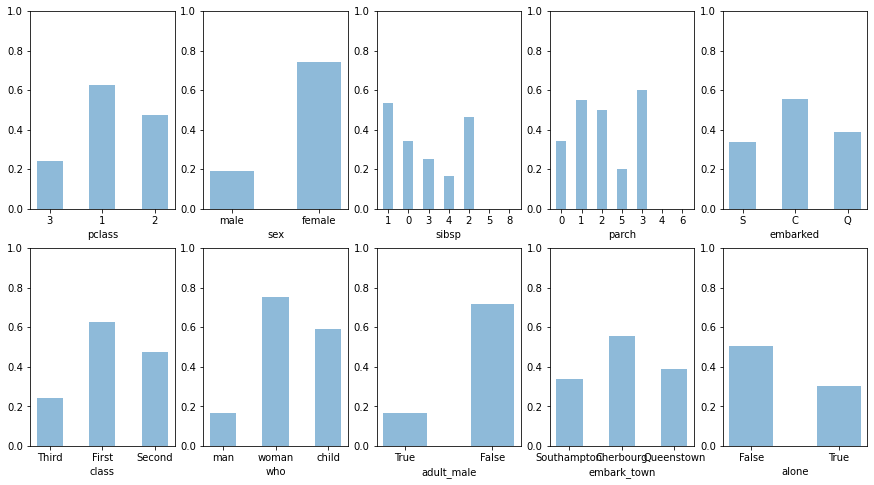

In [8]:
fig, ax = plt.subplots(2,5, figsize=(15,8))

for idx, i in enumerate(features):
    axx = plt.subplot(2,5,idx+1)
    result = feature_surv(df, i)
    axx.bar(np.arange(len(result.keys())), result.values(), width=0.5, alpha=0.5)
    axx.set_xticks(np.arange(len(result.keys())))
    axx.set_xticklabels(result.keys())
    axx.set_xlabel(i)
    axx.set_ylim([0,1])

#     axx.hist(result)

### 2-3. age 변수를 다음과 같이 구분한 후, 생존률을 도식화해주세요.
- 0~10세 : 0
- 10~20세 : 1
...

In [9]:
age = []

for i in df['age']:
    if i < 10:
        age.append(0)
    elif i >= 10 and i < 20:
        age.append(10)
    elif i >= 20 and i < 30:
        age.append(20)
    elif i >= 30 and i < 40:
        age.append(30)
    elif i >= 40 and i < 50:
        age.append(40)
    elif i >= 50 and i < 60:
        age.append(50)
    elif i >= 60 and i < 70:
        age.append(60)
    elif i >= 70 and i < 80:
        age.append(70)
    elif i >= 80 and i < 90:
        age.append(80)
        
df['age_new'] = age

age_new
0     0.613
10    0.402
20    0.325
30    0.434
40    0.382
50    0.417
60    0.278
70      NaN
80    1.000
Name: survived, dtype: float64


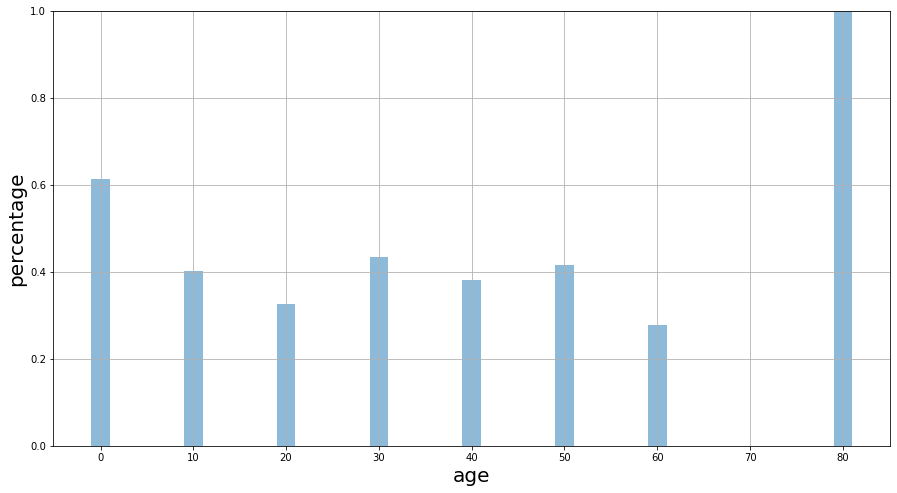

In [11]:
index = [0, 10, 20 ,30 ,40 ,50 ,60 ,70, 80]
surv_perc = df[df['survived']==1].groupby(['age_new'])['survived'].count()/df.groupby(['age_new'])['survived'].count()
# print(df[df['survived']==1].groupby(['age_new'])['survived'].count())
# print(df.groupby(['age_new'])['survived'].count())
print(np.round(surv_perc, 3))
plt.figure(figsize=(15,8))
plt.bar(index, surv_perc, width=2, alpha=0.5)
plt.ylim([0, 1])
plt.xticks(index)
plt.xlabel('age', fontsize=20)
plt.ylabel('percentage', fontsize=20)
plt.grid(True)
plt.show()

### 3. 범주형 변수들을 Label / Onehot Encoding을 통해 정리해주세요.

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_new
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,20
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,30
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,20
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,30
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,20
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,10
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,20
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20


In [13]:
from sklearn.preprocessing import LabelEncoder

category = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town' , 'alive', 'alone']
enc = LabelEncoder()
for feature in category:
    enc.fit(df[feature])
    print(feature, ':', enc.classes_, end=' => ')
    df[feature] = enc.transform(df[feature])
    print([i for i in range(len(enc.classes_))])
df

sex : ['female' 'male'] => [0, 1]
embarked : ['C' 'Q' 'S'] => [0, 1, 2]
class : ['First' 'Second' 'Third'] => [0, 1, 2]
who : ['child' 'man' 'woman'] => [0, 1, 2]
adult_male : [False  True] => [0, 1]
embark_town : ['Cherbourg' 'Queenstown' 'Southampton'] => [0, 1, 2]
alive : ['no' 'yes'] => [0, 1]
alone : [False  True] => [0, 1]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_new
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0,0,20
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,0,1,0,30
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1,1,20
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,1,0,30
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,2,0,1,20
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,2,1,1,10
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,2,0,0,20
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,0,1,1,20


### 4.1 생존여부 예측 모델을 생성해주세요.

In [14]:
x = df.drop(['survived', 'alive', 'age'], axis=1)
y = df['survived']

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# ?RandomForestClassifier

In [15]:
from sklearn.metrics import roc_auc_score, accuracy_score

params = {'max_depth':[10, 13, 15, 17, 19],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_leaf_nodes': [10, 15, 20]}

model = RandomForestClassifier(random_state=1)
gs = GridSearchCV(model, params, scoring=accuracy_score)
gs.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 13, 15, 17, 19],
                         'max_leaf_nodes': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring=<function accuracy_score at 0x000001E73D2DEDC8>)

### 4.2 test 데이터셋에 대한 모델 결과를 시각화 해주세요.

In [16]:
print('best parmas : ', gs.best_params_)
# print('best score : ', gs.best_score_)

best_grid = gs.best_estimator_
y_pred = best_grid.predict(x_test)
train_pred = best_grid.predict(x_train)

print('< train >')
print('roc_auc : ', roc_auc_score(y_train, train_pred))
print('accuracy : ', accuracy_score(y_train, train_pred), '\n')

print('< test >')
print('roc_auc : ', roc_auc_score(y_test, y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))

best parmas :  {'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
< train >
roc_auc :  0.8099395286581577
accuracy :  0.8403361344537815 

< test >
roc_auc :  0.8348214285714286
accuracy :  0.8571428571428571


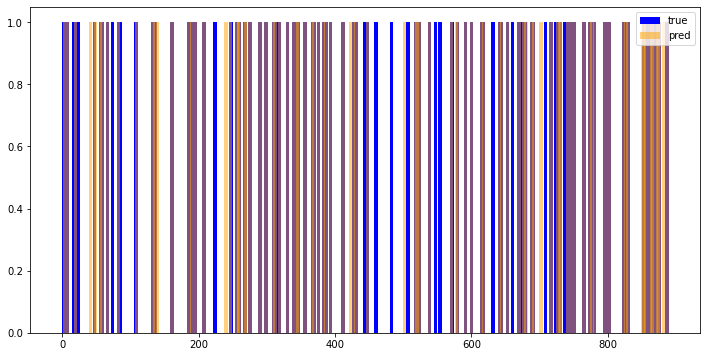

In [17]:
plt.figure(figsize=(12,6))
plt.bar(y_test.index, y_test, label='true', color='blue', width=5)
plt.bar(y_test.index, y_pred, label='pred', color='orange', width=5, alpha=0.5)
plt.legend(loc='upper right')
plt.show()

### 보너스. 남/녀 탑승객 수를 pclass 1~3등급에 따라 시각화 하시오.

In [27]:
bonus = df.groupby(['sex', 'pclass'])['survived'].count()
bonus

sex  pclass
0    1          92
     2          76
     3         144
1    1         122
     2         108
     3         347
Name: survived, dtype: int64

[Text(1.5, 0, '남'), Text(3.5, 0, '여')]

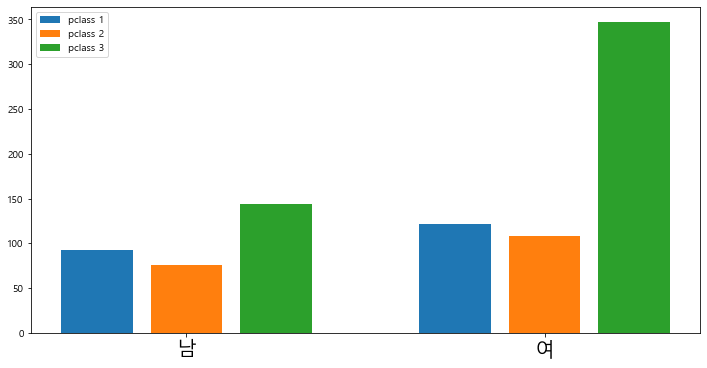

In [52]:
plt.rc('font', family='Malgun Gothic')

index1 = [1, 3]
index2 = [1.5, 3.5]
index3 = [2, 4]

ax, fig = plt.subplots(1,1, figsize=(12,6))
axx = plt.subplot(111)
axx.bar(index1, bonus[:,1], width=0.4, label='pclass 1')
axx.bar(index2, bonus[:,2], width=0.4, label='pclass 2')
axx.bar(index3, bonus[:,3], width=0.4, label='pclass 3')
axx.legend(loc='upper left')

axx.set_xticks(index2)
axx.set_xticklabels(['남', '여'], fontsize=20)